In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot
from sympy.printing.latex import LatexPrinter
from sympy.core.function import _coeff_isneg, AppliedUndef, Derivative
from sympy.printing.precedence import precedence, PRECEDENCE
from spb import *
from scipy.integrate import quad
import numpy as np
import pandas as pd

In [2]:
class CustomPrint(LatexPrinter):
    def _print_Derivative(self, expr):
        diff_symbol = r'\partial'

        
        tex = "" 
        dim = 0
        for x, num in reversed(expr.variable_count):
            dim += num
            if num == 1:
                tex += r"%s %s" % (diff_symbol, self._print(x))
            else:
                tex += r"%s %s^{%s}" % (diff_symbol,
                                        self.parenthesize_super(self._print(x)),
                                        self._print(num))

        if dim == 1:
            tex = r"\frac{%s}{%s}" % (diff_symbol, tex) 
        else:
            tex = r"\frac{%s^{%s}}{%s}" % (diff_symbol, self._print(dim), tex) 

        if any(_coeff_isneg(i) for i in expr.args):
            return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=True,
                                                  strict=True))

        return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=False,
                                                  strict=True))
        
def custom_print_func(expr, **settings):
    return CustomPrint().doprint(expr)

In [3]:
init_printing(use_latex=True,latex_mode="plain",latex_printer=custom_print_func)
plt.rcParams['figure.figsize'] = 10, 8

In [4]:
a,b,c,d,tax,qd,qs,p,x,y,q = symbols('a b c d tax q_d q_s p x y q')

###### Demand function (linear)

In [5]:
demand = Function('q_d')(p)
Eq(demand,a - b*p)
# Where qd = quantity demanded, a = demand parameter, b = demand parameter, p = price

###### Inverse demand function (linear)

In [6]:
inverse_demand = Function('p')(qd)
Eq(inverse_demand,a/b - qd/b)
# Where qd = quantity demanded, a = demand parameter, b = demand parameter, p = price

###### Supply function with tax (linear)

In [7]:
supply_w_tax = Function('q_s')(p)
Eq(supply_w_tax,c + d*(p-tax))
# Where qs = quantity supplied, c = supply parameter, d = supply parameter, p = price, tax = tax

###### Inverse supply function with tax (linear)

In [8]:
inverse_supply_w_tax = Function('p')(qs)
Eq(inverse_supply_w_tax,qs/d -c/d + tax)
# Where qs = quantity supplied, c = supply parameter, d = supply parameter, p = price, tax = tax

###### Supply function without tax (linear)

In [9]:
supply_wo_tax = Function('q_s')(p)
Eq(supply_wo_tax,c + d*p)
# Where qs = quantity supplied, c = supply parameter, d = supply parameter, p = price

###### Inverse supply function without tax (linear)

In [10]:
inverse_supply_wo_tax = Function('p')(qs)
Eq(inverse_supply_wo_tax,qs/d - c/d)
# Where qs = quantity supplied, c = supply parameter, d = supply parameter, p = price

### Competitive market without tax

In [11]:
# Lets assume the following parametres
ex_a_1 = 5
ex_b_1 = 0.2
ex_c_1 = 2
ex_d_1 = 0.3
ex_tax_1 = 0

In [12]:
# Our inverse demand function looks like this
demand = Function('q_d')(p)
Eq(demand,ex_a_1 - ex_b_1*p)

In [13]:
# Our supply function looks like this
supply_w_tax = Function('q_s')(p)
Eq(supply_w_tax,ex_c_1 + ex_d_1*(p-ex_tax_1))

In [14]:
# As tax = 0, in equilibrium this condition is met
Eq(qs,qd)

In [15]:
# To find the equilibrium price we just have to solve the following equation
Eq(ex_a_1 - ex_b_1*p,ex_c_1 + ex_d_1*(p-ex_tax_1))

In [16]:
eq_price_1 = solve(Eq(ex_a_1 - ex_b_1*p,ex_c_1 + ex_d_1*(p-ex_tax_1)),p)[0]
eq_price_1
# This is our equilibrium price

In [17]:
# Now we just introduce this value in any of the supply or demand functions to get the equilibrium quantity
eq_quantity_1 = ex_c_1 + ex_d_1*(eq_price_1-ex_tax_1)
eq_quantity_1
# This is our equilibrium quantity

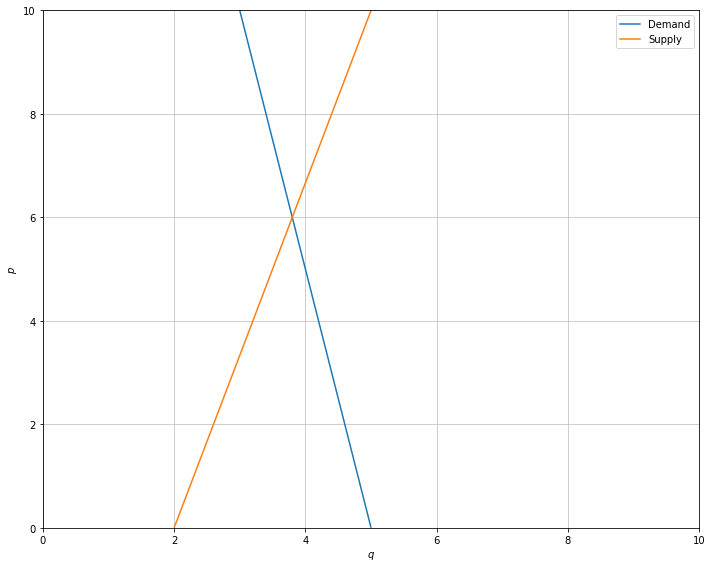

In [18]:
# We can see the graphic solution
p1 = plot_implicit(Eq(p,ex_a_1/ex_b_1-q/ex_b_1),(q, 0, 10),(p, 0, 10),label = 'Demand',legend=True,show=False)
p2 = plot_implicit(Eq(p,q/ex_d_1 -ex_c_1/ex_d_1 + ex_tax_1),(q, 0, 30),(p, 0, 10),label = 'Supply',legend=True,show=False)
p1.append(p2[0])
p1.show()
# Remember we are plotting the inverse functions

In [19]:
# Now we can calculate consumer and producer surplus
producer_surplus_1 = ((eq_price_1 - (-ex_c_1/ex_d_1 + ex_tax_1)) * eq_quantity_1) / 2
consumer_surplus_1 = ((ex_a_1/ex_b_1 - eq_price_1) * eq_quantity_1) / 2
print(f'Consumer surplus: {consumer_surplus_1}\nProducer surplus: {producer_surplus_1}')

Consumer surplus: 36.1000000000000
Producer surplus: 24.0666666666667


### Competitve market with tax

In [20]:
# Note: the tax we are assumming will be placed on producers

In [21]:
# Lets keep using the same parametres, but this time with a tax value different than 0
ex_a_2 = 5
ex_b_2 = 0.2
ex_c_2 = 2
ex_d_2 = 0.3
ex_tax_2 = 2

In [22]:
# Our inverse demand function looks like this
demand = Function('q_d')(p)
Eq(demand,ex_a_2 - ex_b_2*p)

In [23]:
# Our supply function looks like this
supply_w_tax = Function('q_s')(p)
Eq(supply_w_tax,ex_c_2 + ex_d_2*(p-ex_tax_2))

In [24]:
# As tax = 0, in equilibrium this condition is met
Eq(qs,qd)

In [25]:
# To find the equilibrium price we just have to solve the following equation
Eq(ex_a_2 - ex_b_2*p,ex_c_2 + ex_d_2*(p-ex_tax_2))

In [26]:
eq_price_2 = solve(Eq(ex_a_2 - ex_b_2*p,ex_c_2 + ex_d_2*(p-ex_tax_2)),p)[0]
eq_price_2
# This is our equilibrium price

In [27]:
# Now we just introduce this value in any of the supply or demand functions to get the equilibrium quantity
eq_quantity_2 = ex_c_2 + ex_d_2*(eq_price_2-ex_tax_2)
eq_quantity_2
# This is our equilibrium quantity

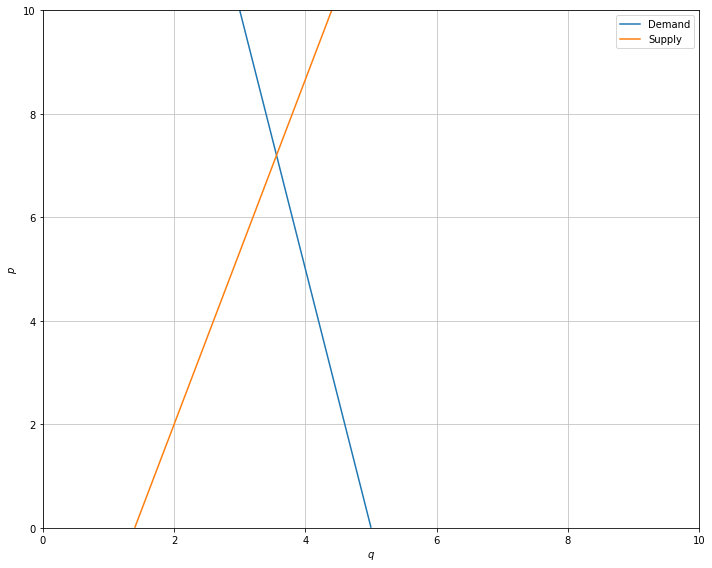

In [28]:
# We can see the graphic solution
p1 = plot_implicit(Eq(p,ex_a_2/ex_b_2-q/ex_b_2),(q, 0, 10),(p, 0, 10),label = 'Demand',legend=True,show=False)
p2 = plot_implicit(Eq(p,q/ex_d_2 -ex_c_2/ex_d_2 + ex_tax_2),(q, 0, 30),(p, 0, 10),label = 'Supply',legend=True,show=False)
p1.append(p2[0])
p1.show()
# Remember we are plotting the inverse functions

In [29]:
# Now we can calculate consumer and producer surplus
producer_surplus_2 = ((eq_price_2 - (-ex_c_2/ex_d_2 + ex_tax_2)) * eq_quantity_2) / 2
consumer_surplus_2 = ((ex_a_2/ex_b_2 - eq_price_2) * eq_quantity_2) / 2
print(f'Consumer surplus: {consumer_surplus_2}\nProducer surplus: {producer_surplus_2}')

Consumer surplus: 31.6840000000000
Producer surplus: 21.1226666666667


In [30]:
# As we used the same parametres as the market without tax, we can calculate the deadweight loss that the tax caused
deadweight_loss = (eq_price_2-eq_price_1)*(eq_price_2-eq_price_1)/2
print(f'Deadweight loss: {deadweight_loss}')

Deadweight loss: 0.720000000000000


In [31]:
# We can also calculate tax revenue
tax_rev = ex_tax_2 * eq_quantity_2
print(f'Tax revenue: {tax_rev}')

Tax revenue: 7.12000000000000


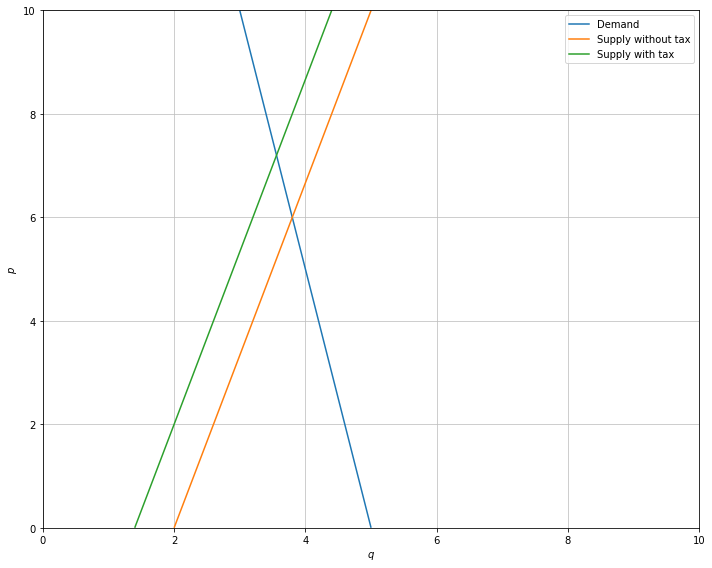

In [32]:
# Lets plot both situations together as the parametres are the same
p1 = plot_implicit(Eq(p,ex_a_1/ex_b_1-q/ex_b_1),(q, 0, 10),(p, 0, 10),label = 'Demand',legend=True,show=False)
p2 = plot_implicit(Eq(p,q/ex_d_1 -ex_c_1/ex_d_1 + ex_tax_1),(q, 0, 30),(p, 0, 10),label = 'Supply without tax',legend=True,show=False)
p3 = plot_implicit(Eq(p,q/ex_d_2 -ex_c_2/ex_d_2 + ex_tax_2),(q, 0, 30),(p, 0, 10),label = 'Supply with tax',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()
# Remember we are plotting the inverse functions